In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [4]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-11-25 16:14:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-11-25 16:14:17 (41.1 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:
!ls

moore.csv  sample_data


In [6]:
data = pd.read_csv('moore.csv',header = None)
print(data.head(5))
data = data.to_numpy()
# this is 162 by 2 first column gives year and seconf gives no. of transistors on a chip that year

      0     1
0  1971  2300
1  1972  3500
2  1973  2500
3  1973  2500
4  1974  4100


In [7]:
print('printing data as it is')
print(data[0:5,:])
print('\nprinting x')
x = data[:,0]
print(x[0:5])
x = x.reshape(-1,1)  # -1 is like a wild card tell u to put put what ever keeps coming
# all the libraries expect data in a format such that  [ [] , [] , [] ] - just one array of featurs inside of the array contain sub arrays with each
# sub array containg a single row of features
print('\nprinting after RESHAPING x')
print(x[0:5])

printing data as it is
[[1971 2300]
 [1972 3500]
 [1973 2500]
 [1973 2500]
 [1974 4100]]

printing x
[1971 1972 1973 1973 1974]

printing after RESHAPING x
[[1971]
 [1972]
 [1973]
 [1973]
 [1974]]


In [8]:
y = data[:,1]

Text(0, 0.5, '# transistors (power of 10)')

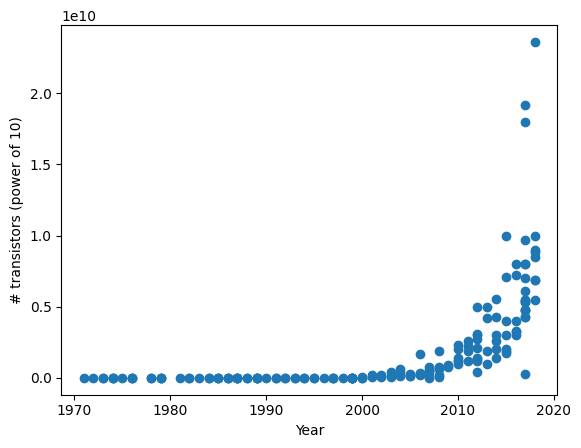

In [9]:
plt.scatter(x,y)
plt.xlabel("Year")
plt.ylabel("# transistors (power of 10)")

Text(0, 0.5, 'log of # transistors')

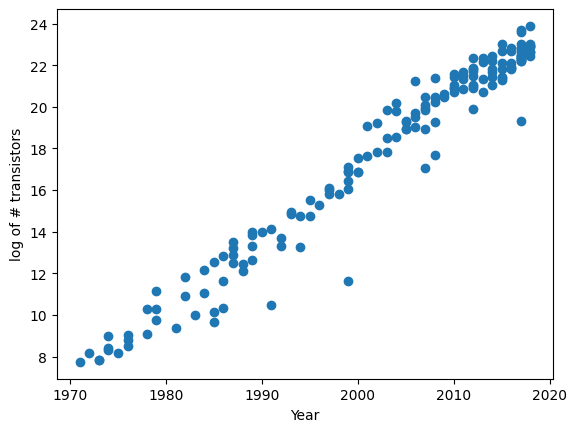

In [10]:
y = np.log(y)
plt.scatter(x,y)
plt.xlabel("Year")
plt.ylabel("log of # transistors")

In [11]:
x = x - x.mean()

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (1,)),
    tf.keras.layers.Dense(1)
])

In [13]:
model.compile(
    optimizer = tf.keras.optimizers.SGD(0.001,0.9), # using custom optimizer because we didnt scale the data
    loss = 'mse'
)

In [14]:
def schedule(epoch,lr):
  if(epoch<50):
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [15]:
type(scheduler)

keras.src.callbacks.LearningRateScheduler

In [16]:
r = model.fit(x,y, epochs = 200 , callbacks = [scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 316.7928 - lr: 1.0000e-04
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 315.8691 - lr: 1.0000e-04
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 312.0966 - lr: 1.0000e-04
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 323.3080 - lr: 1.0000e-04
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 298.9632 - lr: 1.0000e-04
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 290.0825 - lr: 1.0000e-04
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 284.0005 - lr: 1.0000e-04
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 273.7284 - lr: 1.0000e-04
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 271.0089 - lr: 1.0000e-04
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 266.2553 - lr: 1.0000e-04
Epoch 11/200
6/6 [===========

In [19]:
loss = model.evaluate(x,y)
print('--------------------------------------\nloss on training data = ',loss)

6/6 [==============================] - 0s 2ms/step - loss: 1.1520
--------------------------------------
loss on training data =  1.1520018577575684


Text(0.5, 1.0, 'Loss , final loss = 1.1520018577575684')

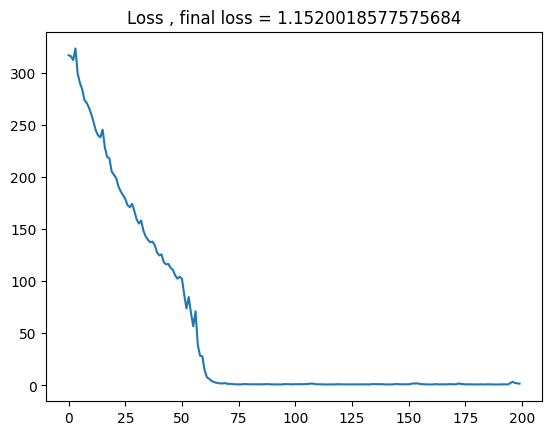

In [25]:
plt.plot(r.history['loss'])
str = "Loss , final loss = " + str(loss)
plt.title(str)

In [22]:
model.save("mooresLaw.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from google.colab import files
files.download('/content/mooresLaw.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>